# Time dependence - function time

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

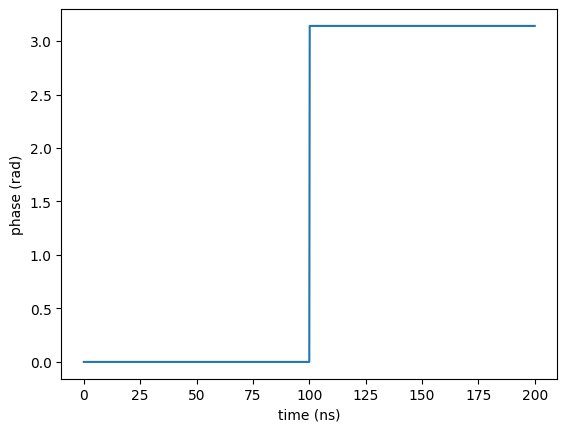

In [2]:
# define a phase jump
class PhaseJump(nx.FunctionTime):

    def __init__(self, t0):
        super().__init__("phase jump")
        self.t0 = t0

    def Function(self, time):
        phase = 0
        if time > self.t0:
            phase = np.pi
        return phase

#create a FunctionTime object with a phase jump at 100 ns
func_phase = PhaseJump(100)

# create a time array
times = np.linspace(0, 200, 1001)

# calculate phase by call the function
phase = [func_phase.Function(t) for t in times]

plt.plot(times, phase)
plt.xlabel("time (ns)")
plt.ylabel("phase (rad)")
plt.savefig("phase_jump.png")
plt.show()

In [3]:
class DisplacementJump(nx.FunctionTime):
    def __init__(self, t0):
        super().__init__("displacement jump")
        self.t0 = t0
        self.k = nx.lib.moessbauer.Fe57.kvector
        self.wavelength = nx.lib.moessbauer.Fe57.wavelength

    def Function(self, time):
        x = 0
        if time > self.t0:
            x = 1/2 * self.wavelength
        phase = self.k * x
        return phase

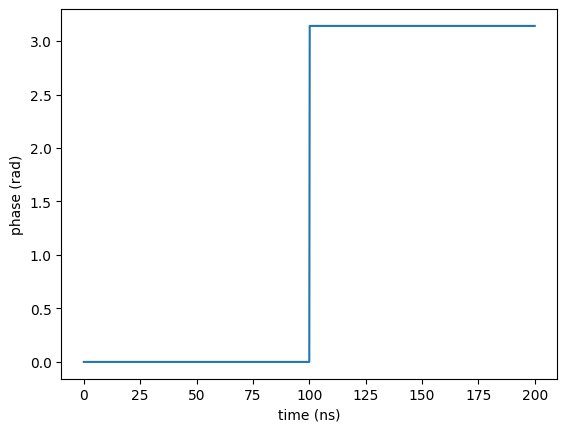

In [4]:
# phase jump at 100 ns
func = DisplacementJump(100)

# create a time array
times = np.linspace(0, 200, 1001)

# calculate phase by call the function
phase = [func_phase.Function(t) for t in times]

plt.plot(times, phase)
plt.xlabel("time (ns)")
plt.ylabel("phase (rad)")
plt.show()